<a href="https://colab.research.google.com/github/Salvatorelezza/machine-learning/blob/master/25052025PhytonCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Permit type is filtered

In [ ]:
# First, install any necessary dependencies (if not already available)
!pip install pandas openpyxl

# Import required libraries
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the original Excel file
# A file chooser will appear; select your `OriginalFile.xlsx`.
uploaded = files.upload()

# Step 2: Read the uploaded Excel file into a pandas DataFrame
# Replace 'OriginalFile.xlsx' with the exact filename if different
df = pd.read_excel(io.BytesIO(uploaded['OriginalFile.xlsx']))

# Step 3: Define the list of permit types to keep
allowed_permit_types = [
    'PERMIT - NEW CONSTRUCTION',
    'PERMIT - WRECKING/DEMOLITION',
    'PERMIT - RENOVATION/ALTERATION'
]

# Step 4: Filter the DataFrame to include only the allowed permit types
filtered_df = df[df['PERMIT_TYPE'].isin(allowed_permit_types)]

# Step 5: Save the filtered DataFrame to a new Excel file
output_filename = 'FilePermitType_cleaned.xlsx'
filtered_df.to_excel(output_filename, index=False)

# Step 6: Download the cleaned Excel file
files.download(output_filename)


Saving OriginalFile.xlsx to OriginalFile.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Null and ouliers are removed

In [ ]:
# Install dependencies (if not already available)
!pip install pandas openpyxl scipy

# Import required libraries
from google.colab import files
import pandas as pd
import numpy as np
import io

# Step 1: Upload the cleaned permit-type Excel file
# A file chooser will appear; select your `FilePermitType_cleaned.xlsx`.
uploaded = files.upload()

# Step 2: Read the uploaded Excel file into a pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# Step 3: Drop any rows containing null values in any column
df_no_nulls = df.dropna()

# Step 4: Remove outliers from numeric columns using the IQR method
numeric_cols = df_no_nulls.select_dtypes(include=[np.number]).columns
clean_df = df_no_nulls.copy()
for col in numeric_cols:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]

# Step 5: Save the cleaned DataFrame to a new Excel file
output_filename = 'NullValues_cleaned.xlsx'
clean_df.to_excel(output_filename, index=False)

# Step 6: Download the new cleaned file
files.download(output_filename)


Saving FilePermitType_cleaned.xlsx to FilePermitType_cleaned.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

processing time ends at 250

In [ ]:
# Import required libraries
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the null-and-outliers cleaned Excel file
# A file chooser will appear; select your `NullValues_cleaned.xlsx`.
uploaded = files.upload()

# Step 2: Read the uploaded Excel file into a pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# Step 3: Filter out rows where PROCESSING_TIME is greater than 250
filtered_df = df[df['PROCESSING_TIME'] <= 250]

# Step 4: Save the filtered DataFrame to a new Excel file
output_filename = 'ProcessingTime_Cleaned.xlsx'
filtered_df.to_excel(output_filename, index=False)

# Step 5: Download the new cleaned file
files.download(output_filename)


Saving NullValues_cleaned.xlsx to NullValues_cleaned.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reported cost between 10000-200000 are considered

In [ ]:
# Import required libraries
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the processing-time cleaned Excel file
# A file chooser will appear; select your `ProcessingTime_Cleaned.xlsx`.
uploaded = files.upload()

# Step 2: Read the uploaded Excel file into a pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# Step 3: Filter out rows with REPORTED_COST less than 10,000 or greater than 200,000
min_cost = 10000
max_cost = 200000
filtered_df = df[(df['REPORTED_COST'] >= min_cost) & (df['REPORTED_COST'] <= max_cost)]

# Step 4: Save the filtered DataFrame to a new Excel file
output_filename = 'ReportedCost_Cleaned.xlsx'
filtered_df.to_excel(output_filename, index=False)

# Step 5: Download the new cleaned file
files.download(output_filename)


Saving ProcessingTime_Cleaned.xlsx to ProcessingTime_Cleaned.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

review type of type self cert is removed

In [ ]:
# Import required libraries
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the reported-cost cleaned Excel file
# A file chooser will appear; select your `ReportedCost_Cleaned.xlsx`.
uploaded = files.upload()

# Step 2: Read the uploaded Excel file into a pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# Step 3: Filter out rows where REVIEW_TYPE equals 'SELF CERT'
filtered_df = df[df['REVIEW_TYPE'] != 'SELF CERT']

# Step 4: Save the filtered DataFrame to a new Excel file
output_filename = 'ReviewType_Cleaned.xlsx'
filtered_df.to_excel(output_filename, index=False)

# Step 5: Download the new cleaned file
files.download(output_filename)

Saving ReportedCost_Cleaned.xlsx to ReportedCost_Cleaned.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Work description category association

In [ ]:
# Install dependencies (if not already available)
!pip install pandas openpyxl

# Import required libraries
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the review-type cleaned Excel file
# A file chooser will appear; select your `ReviewType_Cleaned.xlsx`.
uploaded = files.upload()

# Step 2: Read the uploaded Excel file into a pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# Step 3: Define keyword-to-category mapping for WORK_DESCRIPTION
keyword_map = {
    1: ['rebuild'],
    2: ['replace', 'replacement'],
    3: ['revision'],
    4: ['install'],
    5: ['repair'],
    6: ['remove'],
    7: ['alteration', 'attach', 'detach'],
    8: ['construct'],
    9: ['conversion', 'convert'],
    10: ['remodel'],
    11: ['erect'],
    12: ['build'],
    13: ['demolish'],
}

# Helper function to assign category
def assign_category(desc):
    text = str(desc).lower()
    for cat, keywords in keyword_map.items():
        for kw in keywords:
            if kw in text:
                return cat
    return None

# Step 4: Create the WD_ONEHOTENCODED column
df['WD_ONEHOTENCODED'] = df['WORK_DESCRIPTION'].apply(assign_category)

# Step 5: Save to a new Excel file
output_filename = 'WD_ONEHOTENCODED_Cleaned.xlsx'
df.to_excel(output_filename, index=False)

# Step 6: Download the new file
files.download(output_filename)


Saving ReviewType_Cleaned.xlsx to ReviewType_Cleaned.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nulls in the category is removed

In [ ]:
# Install dependencies (if not already available)
!pip install pandas openpyxl

# Import required libraries
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the WD_ONEHOTENCODED cleaned Excel file
# A file chooser will appear; select your `WD_ONEHOTENCODED_Cleaned.xlsx`.
uploaded = files.upload()

# Step 2: Read the uploaded Excel file into a pandas DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[filename]))

# Step 3: Drop rows where WD_ONEHOTENCODED is null
df_clean = df.dropna(subset=['WD_ONEHOTENCODED'])

# Step 4: Save the cleaned DataFrame to a new Excel file
output_filename = 'WD_Category_Nulls_Cleans.xlsx'
df_clean.to_excel(output_filename, index=False)

# Step 5: Download the new cleaned file
files.download(output_filename)

Saving WD_ONEHOTENCODED_Cleaned.xlsx to WD_ONEHOTENCODED_Cleaned.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Upload your local Excel file
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

# 2. Read the uploaded file into a DataFrame
input_filename = list(uploaded.keys())[0]
df = pd.read_excel(io.BytesIO(uploaded[input_filename]))

# 3. Compute the average PROCESSING_TIME for duplicates
group_cols = [col for col in df.columns if col != 'PROCESSING_TIME']
df_cleaned = df.groupby(group_cols, as_index=False)['PROCESSING_TIME'].mean()

# 4. Save the cleaned DataFrame to a new Excel file
output_filename = 'Duplicate_Cleaned.xlsx'
df_cleaned.to_excel(output_filename, index=False)

# 5. Download the result back to your local machine
files.download(output_filename)


Saving WD_Category_Nulls_Cleans.xlsx to WD_Category_Nulls_Cleans.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1) Install Excel engine
!pip install -q openpyxl

# 2) Imports
import pandas as pd
from google.colab import files

# 3) Upload your .xlsx
uploaded = files.upload()  # select Duplicates_cleaned.xlsx (or your own file)

# 4) Read into DataFrame
fname = list(uploaded.keys())[0]
df = pd.read_excel(fname)

# 5) Ensure PROCESSING_TIME is numeric
#    (if it's stored like "120 days", uncomment the next two lines)
# df['PROCESSING_TIME'] = df['PROCESSING_TIME'].astype(str).str.replace(r'\D+', '', regex=True)
# df['PROCESSING_TIME'] = pd.to_numeric(df['PROCESSING_TIME'], errors='coerce')

# If it's already numeric, just coerce errors:
df['PROCESSING_TIME'] = pd.to_numeric(df['PROCESSING_TIME'], errors='coerce')

# 6) Filter to keep only entries with PROCESSING_TIME ≤ 100 days
filtered_df = df[df['PROCESSING_TIME'] <= 100].reset_index(drop=True)

# 7) Inspect the result
print(f"Original rows: {len(df)}")
print(f"Kept rows (≤100 days): {len(filtered_df)}")
filtered_df.head()

# 8) (Optional) Save & download
filtered_df.to_excel('filtered_up_to_100_days.xlsx', index=False)
files.download('filtered_up_to_100_days.xlsx')

Saving WD_Category_Nulls_Cleans.xlsx to WD_Category_Nulls_Cleans.xlsx
Original rows: 54018
Kept rows (≤100 days): 53852


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Please upload your dataset file (Excel .xlsx/.xls or .csv):


Saving filtered_up_to_100_days.xlsx to filtered_up_to_100_days.xlsx
Uploaded file: filtered_up_to_100_days.xlsx
Numeric features: ['REPORTED_COST', 'APPLICATION_START_DATE_month_sin', 'APPLICATION_START_DATE_month_cos', 'ISSUE_DATE_month_sin', 'ISSUE_DATE_month_cos', 'APPLICATION_START_DATE_weekday_sin', 'APPLICATION_START_DATE_weekday_cos', 'ISSUE_DATE_weekday_sin', 'ISSUE_DATE_weekday_cos']
Categorical features: ['PERMIT_TYPE', 'Community Areas', 'WD_ONEHOTENCODED']
Best params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200}
Test R²: 0.873, MSE: 88.87


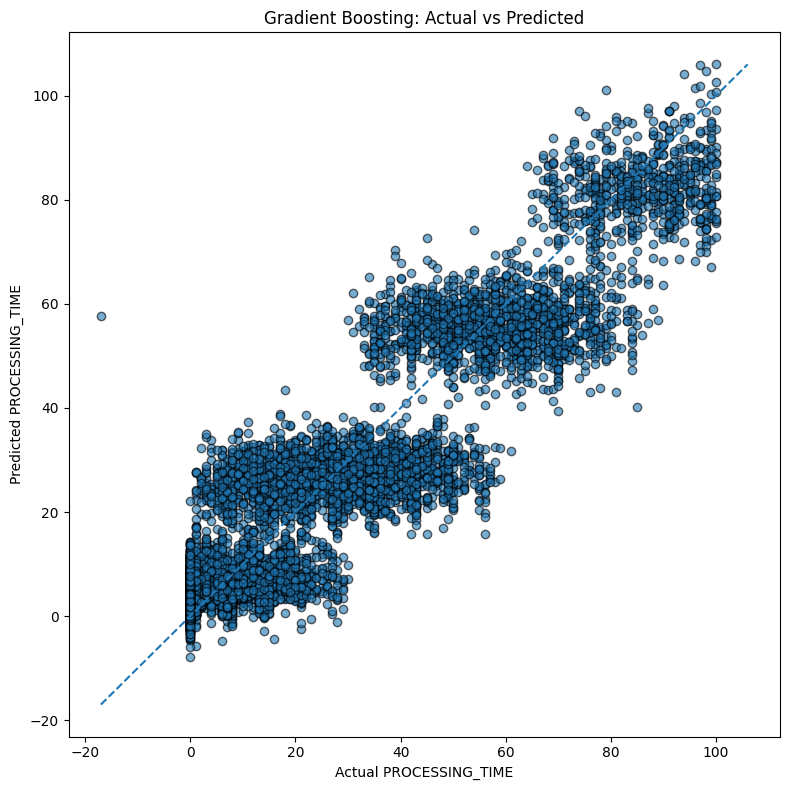

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# For Colab file upload
from google.colab import files
print("Please upload your dataset file (Excel .xlsx/.xls or .csv):")
uploaded = files.upload()
filename = next(iter(uploaded.keys()))
print(f"Uploaded file: {filename}")

# Load dataset
ext = os.path.splitext(filename)[1].lower()
if ext in ['.xls', '.xlsx']:
    df = pd.read_excel(io.BytesIO(uploaded[filename]), engine='openpyxl')
elif ext == '.csv':
    df = pd.read_csv(io.StringIO(uploaded[filename].decode('latin1')))
else:
    raise ValueError(f"Unsupported file extension: {ext}")

# Verify target
TARGET = 'PROCESSING_TIME'
if TARGET not in df.columns:
    raise KeyError(f"'{TARGET}' not in data")

# 0. Prefix categorical codes
# Community Areas: add "Community " before number
for col in df.columns:
    if col.lower() == 'community areas':
        df[col] = 'Community ' + df[col].astype(str)
# WD_ONEHOTENCODED: add "WD" before number
for col in df.columns:
    if col.lower() == 'wd_onehotencoded':
        df[col] = 'WD' + df[col].astype(str)

# 1. Feature engineering: parse dates and create cyclical features
date_cols = ['APPLICATION_START_DATE', 'ISSUE_DATE']
date_month_cols = []
date_weekday_cols = []
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        month_col = f'{col}_month'
        wd_col = f'{col}_weekday'
        df[month_col] = df[col].dt.month
        df[wd_col] = df[col].dt.weekday
        date_month_cols.append(month_col)
        date_weekday_cols.append(wd_col)
# Drop raw date columns
df.drop(columns=[c for c in date_cols if c in df.columns], inplace=True)

# Create sine/cosine transformations explicitly
for col in date_month_cols:
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / 12)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / 12)
for col in date_weekday_cols:
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / 7)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / 7)
# Drop original month/weekday columns
df.drop(columns=date_month_cols + date_weekday_cols, inplace=True)

# 2. Define X, y
X = df.drop(columns=[TARGET])
y = df[TARGET]

# 3. Identify feature types
numeric_features = [c for c in X.columns if X[c].dtype in [np.float64, np.int64]]
# ensure REPORTED_COST is numeric
if 'REPORTED_COST' in X.columns and 'REPORTED_COST' not in numeric_features:
    numeric_features.append('REPORTED_COST')

categorical_features = [c for c in X.columns if X[c].dtype == 'object' or X[c].dtype.name == 'category']

print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

# 4. Preprocessing transformer
transformers = []
if numeric_features:
    transformers.append(('num', StandardScaler(), numeric_features))
if categorical_features:
    transformers.append(('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features))
preprocessor = ColumnTransformer(transformers, remainder='drop')

# 5. Pipeline and hyperparameter tuning
pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

grid = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}
search = GridSearchCV(pipeline, grid, cv=5, scoring='r2', n_jobs=-1, error_score='raise')
search.fit(X, y)
print(f"Best params: {search.best_params_}")

# 6. Evaluate on hold-out test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best = search.best_estimator_
best.fit(X_train, y_train)
y_pred = best.predict(X_test)
print(f"Test R²: {r2_score(y_test, y_pred):.3f}, MSE: {mean_squared_error(y_test, y_pred):.2f}")

# 7. Plot results
min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([min_val, max_val], [min_val, max_val], '--')
plt.xlabel('Actual PROCESSING_TIME')
plt.ylabel('Predicted PROCESSING_TIME')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 7.08


In [ ]:
import numpy as np

# 1. Percentiles of the absolute errors
abs_errors = np.abs(y_test - y_pred)

#   • 50th percentile (median absolute error)
p50 = np.percentile(abs_errors, 50)
print(f"50th percentile of |errors| (Median AE): {p50:.2f}")

#   • 90th percentile of absolute errors
p90 = np.percentile(abs_errors, 90)
print(f"90th percentile of |errors|: {p90:.2f}")

# 2. Percentiles of the raw error distribution (which can be negative)
errors = y_test - y_pred
error_p10 = np.percentile(errors, 10)
error_p90 = np.percentile(errors, 90)
print(f"10th percentile of (y_test - y_pred): {error_p10:.2f}")
print(f"90th percentile of (y_test - y_pred): {error_p90:.2f}")

# 3. Percentiles of the predicted values themselves
pred_p25 = np.percentile(y_pred, 25)
pred_p50 = np.percentile(y_pred, 50)
pred_p75 = np.percentile(y_pred, 75)
print(f"25th/50th/75th percentiles of predictions: {pred_p25:.2f}, {pred_p50:.2f}, {pred_p75:.2f}")

# 4. If you’re using pandas DataFrame/Series instead of NumPy arrays:
#    (assuming y_test_series is a pd.Series of true values, y_pred_series is predicted)
# mae_percentiles = (y_test_series - y_pred_series).abs().quantile([0.5, 0.9])
# print(mae_percentiles)


50th percentile of |errors| (Median AE): 5.01
90th percentile of |errors|: 16.35
10th percentile of (y_test - y_pred): -9.70
90th percentile of (y_test - y_pred): 13.08
25th/50th/75th percentiles of predictions: 4.05, 10.46, 30.36


In [ ]:
# prompt: generate a code that prompts for the application date, reported cost, community area and permit type to predict using the model the target variable

from datetime import datetime

# Assume 'best' is the trained model pipeline from the previous code block
# Assume 'preprocessor' is the fitted ColumnTransformer from the previous code block

def predict_processing_time(model, preprocessor):
    """
    Prompts the user for input features and predicts the target variable.

    Args:
        model: The trained scikit-learn pipeline including the preprocessor and model.
        preprocessor: The fitted scikit-learn ColumnTransformer used for preprocessing.
    """
    print("\nPlease provide the following information for prediction:")

    # Get Application Date
    while True:
        app_date_str = input("Enter Application Date (YYYY-MM-DD): ")
        try:
            app_date = datetime.strptime(app_date_str, "%Y-%m-%d")
            break
        except ValueError:
            print("Invalid date format. Please use YYYY-MM-DD.")

    # Get Reported Cost
    while True:
        try:
            reported_cost = float(input("Enter Reported Cost: "))
            if reported_cost >= 0: # Assuming cost cannot be negative
                break
            else:
                print("Reported Cost cannot be negative.")
        except ValueError:
            print("Invalid input. Please enter a number for Reported Cost.")

    # Get Community Area
    # You might want to provide a list of valid community areas from your training data
    # For simplicity, we'll just take the input string.
    community_area = input("Enter Community Area (e.g., 1, 10, etc.): ")
    # Prefix as done during training
    community_area = f'Community {community_area}'


    # Get Permit Type
    # You might want to provide a list of valid permit types from your training data
    valid_permit_types = [
        'PERMIT - NEW CONSTRUCTION',
        'PERMIT - WRECKING/DEMOLITION',
        'PERMIT - RENOVATION/ALTERATION'
    ]
    print(f"Valid Permit Types: {', '.join(valid_permit_types)}")
    while True:
        permit_type = input("Enter Permit Type: ")
        if permit_type in valid_permit_types:
            break
        else:
            print("Invalid Permit Type. Please choose from the list.")

    # Get WD_ONEHOTENCODED (using the same mapping as during training)
    print("\nEnter a keyword from the Work Description (e.g., replace, install):")
    print("Keywords and Categories:")
    keyword_map_print = {
        1: ['rebuild'], 2: ['replace', 'replacement'], 3: ['revision'],
        4: ['install'], 5: ['repair'], 6: ['remove'],
        7: ['alteration', 'attach', 'detach'], 8: ['construct'],
        9: ['conversion', 'convert'], 10: ['remodel'],
        11: ['erect'], 12: ['build'], 13: ['demolish'],
    }
    for cat, kws in keyword_map_print.items():
        print(f"Category {cat}: {', '.join(kws)}")

    def assign_category_for_input(desc):
        text = str(desc).lower()
        for cat, keywords in keyword_map.items(): # Use the keyword_map defined earlier
            for kw in keywords:
                if kw in text:
                    return f'WD{cat}' # Prefix as done during training
        return None # Handle cases where no keyword matches

    while True:
        work_desc_keyword = input("Enter a keyword from the Work Description: ")
        wd_encoded = assign_category_for_input(work_desc_keyword)
        if wd_encoded is not None:
            break
        else:
            print("Keyword not found in the mapping. Please try another keyword.")


    # Create a DataFrame for the input
    # Match the column names and order used during training
    input_data = pd.DataFrame([{
        'APPLICATION_START_DATE': app_date,
        'REPORTED_COST': reported_cost,
        'COMMUNITY AREAS': community_area,
        'PERMIT_TYPE': permit_type,
        'WD_ONEHOTENCODED': wd_encoded # This will be the prefixed category
    }])

    # Re-apply feature engineering for the date column
    date_cols_input = ['APPLICATION_START_DATE']
    for col in date_cols_input:
        if col in input_data.columns:
            input_data[col] = pd.to_datetime(input_data[col], errors='coerce')
            month_col = f'{col}_month'
            wd_col = f'{col}_weekday'
            input_data[month_col] = input_data[col].dt.month
            input_data[wd_col] = input_data[col].dt.weekday
            # Create sine/cosine transformations explicitly
            input_data[f'{month_col}_sin'] = np.sin(2 * np.pi * input_data[month_col] / 12)
            input_data[f'{month_col}_cos'] = np.cos(2 * np.pi * input_data[month_col] / 12)
            input_data[f'{wd_col}_sin'] = np.sin(2 * np.pi * input_data[wd_col] / 7)
            input_data[f'{wd_col}_cos'] = np.cos(2 * np.pi * input_data[wd_col] / 7)
            # Drop original date, month, weekday columns
            input_data.drop(columns=[col, month_col, wd_col], inplace=True)


    # Ensure input columns match training columns
    # This step is crucial if the preprocessor expects a specific set of columns.
    # Get the list of feature names the preprocessor expects after fitting.
    # This can be complex with ColumnTransformer. A common way is to fit on X_train
    # and inspect the transformed column names, or ensure the order/names match X_train.
    # For simplicity here, we'll ensure the input_data columns match the final
    # columns used in the preprocessor's fit.
    # This requires knowing the final set of columns after preprocessing and fe.
    # A more robust approach would involve storing the final column list from X_train.
    # For this example, we'll assume the expected columns are the processed date features,
    # REPORTED_COST, and the categorical features.
    # A safer way is to process the single input row using the *same* preprocessor logic
    # that was applied to the training data before the model, *but* the pipeline
    # handles this if the input DataFrame has the original column names.

    # The pipeline 'best' already contains the 'prep' (ColumnTransformer) step.
    # We just need to pass the input_data DataFrame with the original column names
    # (plus the engineered features).

    # Need to add back other expected columns with default values or handle them.
    # A better approach: Create an empty DataFrame with ALL training columns and fill it.
    input_df_template = pd.DataFrame(columns=X_train.columns) # Use columns from the training data
    input_df_template = pd.concat([input_df_template, input_data], ignore_index=True)

    # Fill NaN values that were not in the input with appropriate defaults if necessary
    # (e.g., 0 for numerical, a placeholder for categorical if 'handle_unknown'='ignore')
    # The 'handle_unknown'='ignore' in OneHotEncoder helps with unseen categories.
    # For simplicity, fill NaNs with 0 for numeric and empty string for others,
    # but this might need adjustment based on your data.
    for col in input_df_template.columns:
        if col in ['REPORTED_COST'] or '_sin' in col or '_cos' in col:
             input_df_template[col] = input_df_template[col].fillna(0)
        elif col in ['COMMUNITY AREAS', 'PERMIT_TYPE', 'WD_ONEHOTENCODED']:
             # OneHotEncoder with drop='first' and handle_unknown='ignore'
             # will handle unseen categories by setting all corresponding hot-encoded
             # features to 0. Leaving NaNs here might cause issues.
             # A simple fillna('') might work if the preprocessor handles it.
             # Or, better, ensure the categorical values exist in the preprocessor's
             # fitted categories. Given handle_unknown='ignore', providing an empty string
             # or some placeholder might be necessary if the category wasn't in training.
             # A safer approach might be to manually ensure the column exists and fill NaNs.
             if col not in input_df_template.columns:
                 input_df_template[col] = '' # Add column if missing
             input_df_template[col] = input_df_template[col].fillna('') # Fill NaNs

    # Ensure the order of columns in input_df_template matches X_train
    input_df_template = input_df_template[X_train.columns]


    # Predict
    try:
        prediction = model.predict(input_df_template)
        print(f"\nPredicted PROCESSING_TIME: {prediction[0]:.2f} days")
    except Exception as e:
        print(f"\nAn error occurred during prediction: {e}")
        print("Please check your input format and the trained model.")


# Example usage: Call the function with your trained model 'best'
# Make sure the 'best' pipeline object is available in the current scope
if 'best' in globals():
    predict_processing_time(best, preprocessor)
else:
    print("\nModel 'best' not found. Please run the training code first.")




Please provide the following information for prediction:
Enter Application Date (YYYY-MM-DD): 2025-12-26
Enter Reported Cost: 210000
Enter Community Area (e.g., 1, 10, etc.): 76
Valid Permit Types: PERMIT - NEW CONSTRUCTION, PERMIT - WRECKING/DEMOLITION, PERMIT - RENOVATION/ALTERATION
Enter Permit Type: PERMIT - RENOVATION/ALTERATION

Enter a keyword from the Work Description (e.g., replace, install):
Keywords and Categories:
Category 1: rebuild
Category 2: replace, replacement
Category 3: revision
Category 4: install
Category 5: repair
Category 6: remove
Category 7: alteration, attach, detach
Category 8: construct
Category 9: conversion, convert
Category 10: remodel
Category 11: erect
Category 12: build
Category 13: demolish
Enter a keyword from the Work Description: REPLACE

Predicted PROCESSING_TIME: 50.77 days


In [ ]:
# 1) Install Gradio (if you haven’t already)
!pip install gradio --quiet

# 2) Import Gradio plus whatever else you need
import gradio as gr
from datetime import datetime
import pandas as pd


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.0 MB/s eta 0:00:00
